In [1]:
#Importing necesary packages
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#Load the traiming and testing data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Defining network architecture using Keras
import keras
model= Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [4]:
#Training model using SGD
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6573 - accuracy: 0.8358 - val_loss: 0.3540 - val_accuracy: 0.9015
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.9061 - val_loss: 0.2900 - val_accuracy: 0.9194
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2885 - accuracy: 0.9189 - val_loss: 0.2588 - val_accuracy: 0.9274
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9279 - val_loss: 0.2395 - val_accuracy: 0.9301
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2352 - accuracy: 0.9342 - val_loss: 0.2168 - val_accuracy: 0.9369


In [ ]:
#Evaluating the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2168 - accuracy: 0.9380
Loss=0.217
Accuracy=0.938


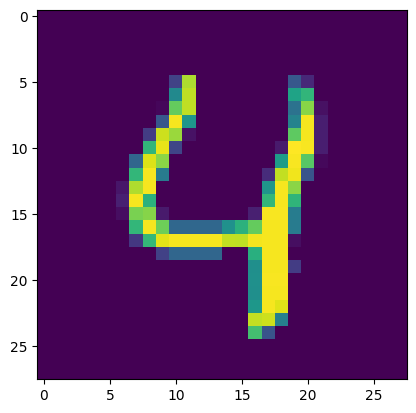

313/313 [==============================] - 1s 2ms/step
The Handwritten number in the image is 4


In [ ]:
n=random.randint(0,9)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The Handwritten number in the image is %d" % np.argmax(prediction[n]))

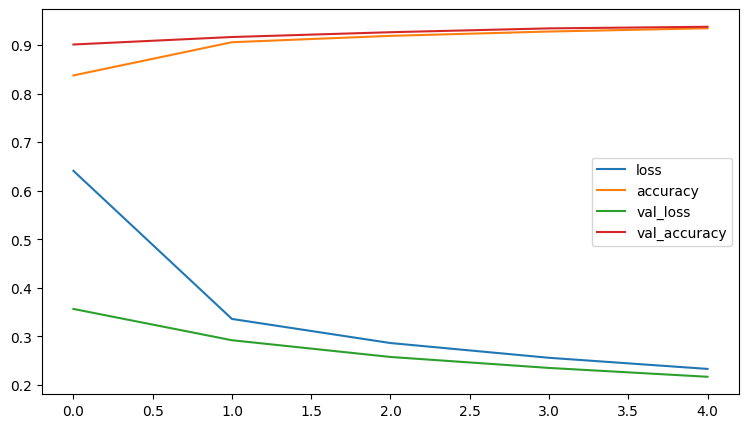

In [ ]:
#Plot training loss and accuracy
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()

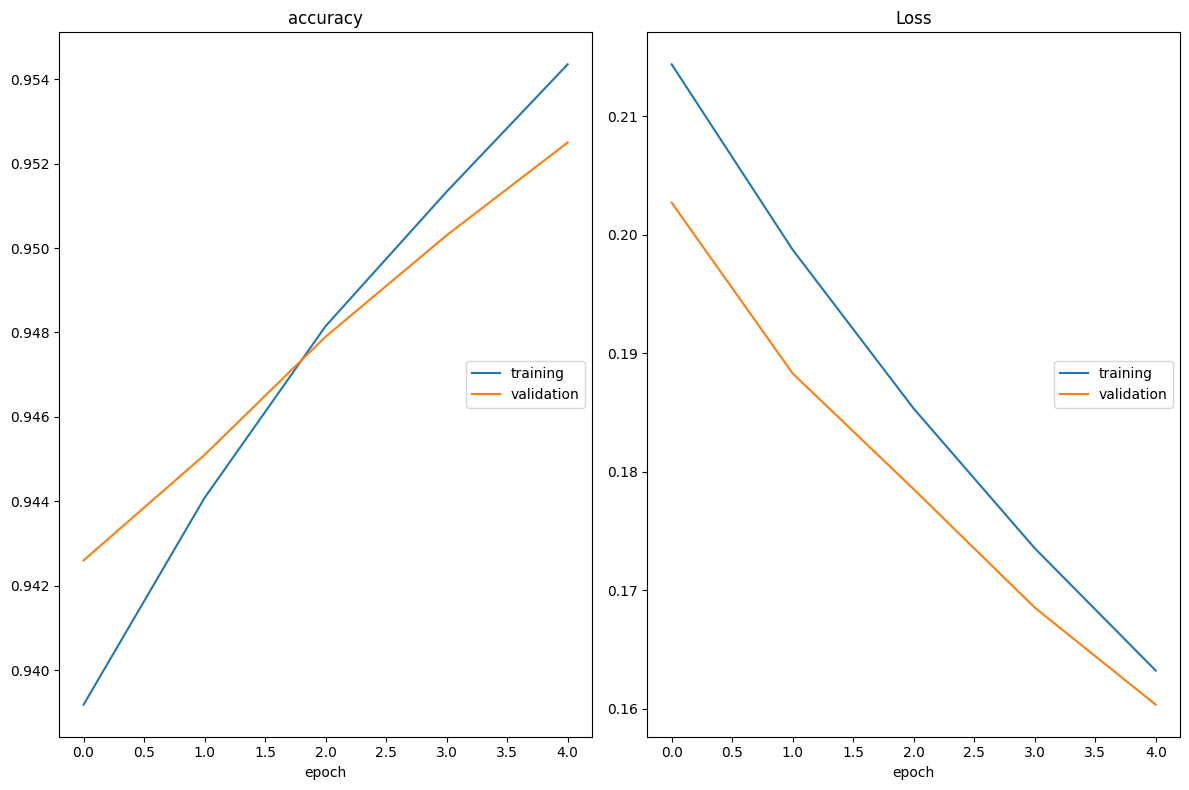

accuracy
	training         	 (min:    0.939, max:    0.954, cur:    0.954)
	validation       	 (min:    0.943, max:    0.952, cur:    0.952)
Loss
	training         	 (min:    0.163, max:    0.214, cur:    0.163)
	validation       	 (min:    0.160, max:    0.203, cur:    0.160)


In [ ]:
#Plotting using keras
!pip install livelossplot
from livelossplot import PlotLossesKeras
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,callbacks=[PlotLossesKeras()],verbose=0)